# Exercise: NEISS, Question Set F

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- String replacement using regular expressions
- Using codebooks

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
%matplotlib inline
#df_nss15 = pd.read_csv('nss15.tsv', sep = '\t') # Getting error because the data is bad
df_nss15 = pd.read_csv('nss15.tsv', sep = '\t', error_bad_lines = False, converters = {'prod1': str, 'prod2':str}) # Getting error because the data is bad

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


In [2]:
df_nss15.head(6)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."


### Check that your dataframe has 357727 rows and 19 columns.

In [3]:
df_nss15.shape

(357727, 19)

### List the columns and their data types

In [4]:
df_nss15.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [5]:
# Types of age
# When the date of birth is not available, the age of the patient must be entered.
# For children under two years old, record the age in months.
# To show that the age is in months instead of years, put a "2" in the first space of the age code.
# Code the age of infants in "completed months;"
# e.g., code the age of infants who are four to seven weeks old as one month.
# Code the age of infants who are less than one month old as one month.

# Examples:
# Age Code
# Three weeks 201 Four weeks (one month) 201 Seven weeks 201 Ten weeks 202
# Nine months 209 Twelve months (one year) 212 Eighteen months 218
# For a patient two years of age or older, record age in years.

# Examples:
# Age Code
# Two years 2 Eight years 8 Forty-five years 45 One hundred years 100 Not recorded 0
# If the patient is older than 115 years old, code the age as 115 and indicate the actual age in the narrative.
# If twins are involved in an incident, and both twins are patients being coded,
# be sure to indicate “Twin A” or “Twin B” in the comment.

df_nss15['age'].value_counts().head()

2     11735
3     10117
14     9209
13     8878
15     8779
Name: age, dtype: int64

In [6]:
# Types of sex
# Indicate the sex of the patient with one of the codes listed below:
# Sex Code: Male 1 Female 2 Not recorded 0
df_nss15['sex'].value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

In [7]:
# Products
# When only one product is associated with an injury, place the product code for that product
# in the space allocated for "First Product Code"
# and fill in the "Second Product Code" spaces with 4 zeros (0000).

# When two products are associated with an injury, either product may be coded as the first
# product and the other as the second product.
df_nss15['prod1'].value_counts().head(6)

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
Name: prod1, dtype: int64

# Cleaning up a column

Take a look at the **race** column. How many rows of each race are there?

In [8]:
# Types of race
# Race
# White: A person having origins in any of the original peoples of Europe, the Middle East, or North Africa. 1
# Black/African American: A person having origins in any of the black racial groups of Africa. 2
# Asian: A person having origins in any of the original peoples of the Far East, Southeast Asia,
# or the Indian subcontinent. 4
# American Indian/Alaska Native: A person having origins in any of the original peoples of North
# and South America (including Central America), and who maintains tribal affiliation or community attachment. 5
# Native Hawaiian/Pacific Islander: A person having origins in any of the original peoples of Hawaii, Guam,
# Samoa, or other Pacific Islands. 6
# Other: Use this code when: (1) the emergency department record indicates more than one race,
# or (2) the race is stated in the emergency department record and none of the above applies.
# Enter the specific race(s) in the "Race Other" text field. 3
# Not Stated in ED record: Use this code when there is no information on the
# patient's race in the emergency department record. 0

df_nss15['race'].value_counts()

1    145813
0    138666
2     48868
3     18884
4      4130
5      1000
6       366
Name: race, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 28 of the column definitions file.

In [9]:
df_nss15.race.replace(1, 'White', inplace=True)
df_nss15.race.replace(2, 'Black/African American', inplace=True)
df_nss15.race.replace(3, 'Other', inplace=True)
df_nss15.race.replace(4, 'Asian', inplace=True)
df_nss15.race.replace(5, 'American Indian/Alaska Native', inplace=True)
df_nss15.race.replace(6, 'Native Hawaiian/Pacific Islander', inplace=True)
df_nss15.race.replace(0, 'Not Stated in ED record', inplace=True)

df_nss15.head(5)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,Not Stated in ED record,NaN,57,NaN,33,1,9,0,1267,,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,Not Stated in ED record,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,Not Stated in ED record,NaN,71,PAIN,35,1,0,0,611,,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 145813 White, 138666 not stated, and 48868 Black.

In [10]:
df_nss15.race.value_counts()

White                               145813
Not Stated in ED record             138666
Black/African American               48868
Other                                18884
Asian                                 4130
American Indian/Alaska Native         1000
Native Hawaiian/Pacific Islander       366
Name: race, dtype: int64

## Graph the number of each race, but don’t included the “Not Stated” records

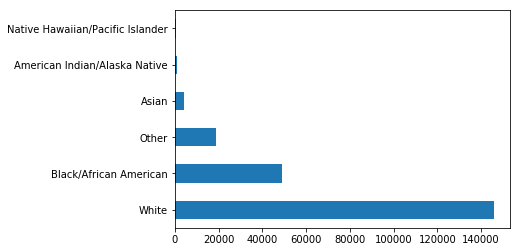

In [11]:
df_race_recorded = df_nss15[df_nss15.race != 'Not Stated in ED record']
df_race_recorded.race.value_counts().plot(kind='barh')

## "Not Stated" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [12]:
import numpy as np
np.nan

nan

In [13]:
nan_values = np.nan
df_nss15.race.replace('Not Stated in ED record', nan_values, inplace=True)
df_nss15.race.value_counts(dropna=False)

White                               145813
NaN                                 138666
Black/African American               48868
Other                                18884
Asian                                 4130
American Indian/Alaska Native         1000
Native Hawaiian/Pacific Islander       366
Name: race, dtype: int64

## Graph the count of each race, but don’t included the “Not Stated” records

Yes, again! The code you use should be different this time.

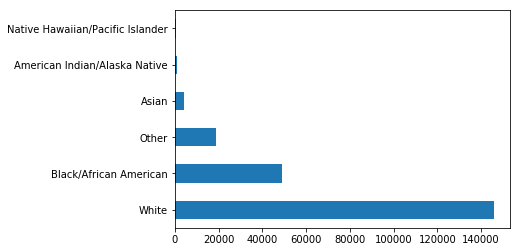

In [14]:
df_nss15.race.value_counts().plot(kind='barh')

## Graph the top 10 most popular products for injuries 

In [15]:
#prod1
df_products = pd.read_csv('categories-cleaned.txt', names = ["product_code", "product_desc"], converters = {'product_code':str})
df_products.head(6)

,product_code,product_desc
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories
5,0113,Floor buffers or waxers


In [16]:
df_new = df_nss15.merge(df_products, left_on = 'prod1', right_on = 'product_code')

In [17]:
df_new = df_new.rename(columns = {'product_code':'prod1_code', 'product_desc':'prod1_desc'})
df_new.head(16)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,prod1_code,prod1_desc
0,150733174,07/11/2015,38,15.7762,V,5,1,NaN,NaN,57,...,33,1,9,0,1267,,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20,2,White,NaN,57,...,36,1,9,0,1267,,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)"
2,150948626,09/08/2015,37,5.6748,C,10,2,NaN,NaN,57,...,33,1,0,0,1267,,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)"
3,151029422,10/06/2015,24,97.9239,M,37,1,White,NaN,64,...,35,1,0,0,1267,,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)"
4,151029234,10/10/2015,21,16.5650,V,13,2,NaN,NaN,62,...,75,1,9,0,1267,,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)"
5,151038066,10/16/2015,21,16.5650,V,13,2,NaN,NaN,64,...,34,1,9,0,1267,,13YF WRIST PAIN S/P FOOSH WHILE PLAYING SOCCER...,>>SPRAIN,1267,"Soccer (activity, apparel or equipment)"
6,150959538,09/18/2015,32,5.6748,C,15,1,White,NaN,64,...,83,1,9,0,1267,,15 YOM PLAYING SOCCER BEGAN HAVING HEEL PAIN D...,NaN,1267,"Soccer (activity, apparel or equipment)"
7,150442809,04/15/2015,25,15.0591,V,15,2,White,NaN,64,...,83,1,8,0,1267,,A 15YOF INJURED FOOT WHILE PLAYING SOCCER AT S...,NaN,1267,"Soccer (activity, apparel or equipment)"
8,151042493,10/15/2015,8,5.6748,C,17,2,White,NaN,57,...,76,1,9,0,1267,,17YOF COLLIDED HEADS PLAYING SOCCER GAME; ORBI...,COMPLEX RFX.,1267,"Soccer (activity, apparel or equipment)"
9,151026219,09/02/2015,14,49.2646,M,15,1,NaN,NaN,52,...,75,1,8,0,1267,,15YOM CONCUSSION - KNEED PLAYING SOCCER,NaN,1267,"Soccer (activity, apparel or equipment)"


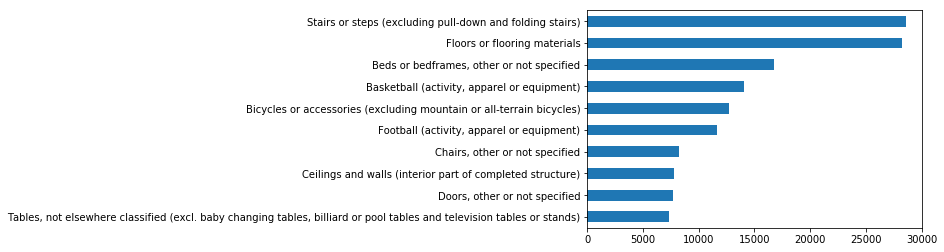

In [18]:
df_new.prod1_desc.value_counts(ascending = True).tail(10).plot(kind='barh')

# Cleaning up `race_other`

## `race_other` is a field for free-form race input. How many patients have a race of "HISPANIC"?

In [19]:
df_hisp = df_new[df_new['race_other'] == 'HISPANIC']
df_hisp.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,prod1_code,prod1_desc
27,151034636,10/10/2015,8,5.6748,C,12,1,White,HISPANIC,71,...,33,1,9,0,1267,,12YOM WAS PLAYING SOCCER 1 DAY AGO WHEN HE WAS...,", C/O HAND/FOREARM PAIN AND SWELLING; FOREARM ...",1267,"Soccer (activity, apparel or equipment)"
33,150720697,06/19/2015,54,49.2646,M,32,1,Other,HISPANIC,53,...,31,1,9,0,1267,,32YOM PLAYING SOCCER & FELL LANDING WIT KNEES ...,S +PAIN & TENDERNESS TO RIB AREA. DX; RIB CON...,1267,"Soccer (activity, apparel or equipment)"
54,150444109,04/16/2015,90,5.6748,C,13,1,Other,HISPANIC,64,...,34,1,9,0,1267,,13YOM- YESTERDAY PT WAS PLAYING SOCCER FOOSH O...,PAIN. DX- RIGHT WRIST SPRAIN.,1267,"Soccer (activity, apparel or equipment)"
66,150406281,03/20/2015,90,5.6748,C,8,1,Other,HISPANIC,62,...,75,1,8,0,1267,,8 YOM TRIPPED OVER SOMEONE'S FOOT WHILE PLAYIN...,"SCHOOL & HIT HIS HEAD- NO LOC, BUT SPOTS IN VI...",1267,"Soccer (activity, apparel or equipment)"
67,150247768,02/20/2015,61,15.7762,V,25,2,Other,HISPANIC,64,...,37,1,9,0,1267,,25 YOF TWISTED HER RIGHT ANKLE WHILE PLAYING S...,"AND WEIGHT BEARING, DX: ANKLE SPRAIN",1267,"Soccer (activity, apparel or equipment)"


In [20]:
df_hisp.shape

(11870, 21)

## What are the top 5 most popular "other" races?

In [21]:
df_other = df_new[df_new.race == "Other"]
df_other.shape

(15676, 21)

In [22]:
df_new.race_other.value_counts().head(5)

HISPANIC        11870
MULTI-RACIAL     1461
UNKNOWN          1316
HISP             1141
NS                395
Name: race_other, dtype: int64

## Searching for multiracial patients

Wow, this data entry is terrible. “Multiracial” is spelled as **MULT RACIAL**, **MULTIPLE RACIAL**, and many more. How many different spellings can you find? **Use only one line to find the spellings.**

- Tip: Be sure to **ignore the na values**.
- Tip: You should probably find the multiracial-ish rows and then `value_counts` their `other_race`
- Tip: Maybe... ask me about .str.contains support for regular expressions?

In [23]:
df_new.race_other.value_counts().head(10)

HISPANIC        11870
MULTI-RACIAL     1461
UNKNOWN          1316
HISP             1141
NS                395
SOMALI            274
MULTIRACIAL       119
UNKN              101
BIRACIAL           25
MULTI              18
Name: race_other, dtype: int64

In [24]:
df_new[df_new.race_other.str.lower().str.contains("^[bm][iu][^d]", na=False)].race_other.value_counts()

MULTI-RACIAL       1461
MULTIRACIAL         119
BIRACIAL             25
MULTI                18
MULTI RACIAL         12
MIXED                 7
BI-RACIAL             2
MULTIRACAIL           1
MULTRACIAL            1
MULTIPLE RACIAL       1
MULT RACIAL           1
Name: race_other, dtype: int64

In [25]:
df_multiracial = df_new[df_new.race_other.str.lower().str.contains("^[bm][iu][^d]", na=False)]
df_multiracial.shape

(1648, 21)

## Replace all of those spellings with “MULTIRACIAL.”

Confirm that you’ve ended up with about 1900 MULTIRACIAL rows (yours might be anywhere between 1899-1910, depending on how many spellings you caught)

In [26]:
df_new['race_other'].replace('^[BM][IU][^D].*', 'MULTIRACIAL', inplace=True, regex=True)
df_new['race_other'].value_counts().head(10)

HISPANIC       11870
MULTIRACIAL     1648
UNKNOWN         1316
HISP            1141
NS               395
SOMALI           274
UNKN             101
NEPALI            17
DECLINED          13
UKNOWN            13
Name: race_other, dtype: int64

## Do the same thing with misspellings of "Unknown"

You should end up with around 1660-1670 UNKNOWN entries

In [27]:
df_new[df_new.race_other.str.contains('U[IKN][NK]', na=False)]['race_other'].value_counts()

UNKNOWN     1316
UNKN         101
UKNOWN        13
UINKNOWN       1
UNKNOKWN       1
UNKNONW        1
UNKOWN         1
UNKNONWN       1
UNKNKOWN       1
UNK            1
UNNOWN         1
Name: race_other, dtype: int64

In [28]:
df_new.race_other.replace('U[IKN][NK].*', 'UNKNOWN', inplace=True, regex=True)
df_new.race_other.value_counts().head(10)

HISPANIC       11870
MULTIRACIAL     1648
UNKNOWN         1438
HISP            1141
NS               395
SOMALI           274
NEPALI            17
DECLINED          13
MEXICAN           10
ARAB               7
Name: race_other, dtype: int64

## What variations on HISPANIC can you find? Standardize them to HISPANIC.

In [29]:
df_new[df_new.race_other.str.contains('^.*IS[^HT].*', na=False)]['race_other'].value_counts()

HISPANIC           11870
HISP                1141
HISPNANIC              2
HISPPANIC              1
HISPANIC/LATINO        1
HISPAANIC              1
HISPANIC S/P B         1
QRYOMHISPANIC          1
HISPAINIC              1
HISO                   1
NISPANIC               1
HISPAINC               1
HISPNIC                1
ISPANIC                1
Name: race_other, dtype: int64

In [30]:
df_new.race_other.replace('^.*IS[^HT].*', 'HISPANIC', regex = True, inplace=True)

## Now try counting the number of hispanic people again.

In [31]:
df_new[df_new.race_other == 'HISPANIC'].shape

(13024, 21)

## Seems like a lot! Update their race column to be ‘Hispanic’ instead of “Other”

You'll try to do this using skills you know, but pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [32]:
df_new.loc[df_new.race_other == 'HISPANIC', "race"] = 'Hispanic'
df_new.race.value_counts()

White                               118712
Black/African American               41149
Hispanic                             13024
Asian                                 3386
Other                                 3306
American Indian/Alaska Native          820
Native Hawaiian/Pacific Islander       296
Name: race, dtype: int64

## Graph the frequency of each race in the dataset

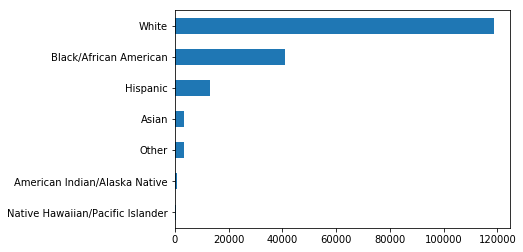

In [33]:
df_new.race.value_counts(ascending=True).plot(kind='barh')

## Find every injury involving unicycles.

In [34]:
df_new[df_new.prod1_desc.str.lower().str.contains('unic', na=False)]['prod1_desc'].value_counts()

Unicycles    5
Name: prod1_desc, dtype: int64

In [35]:
df_new[df_new.prod1_desc.str.lower().str.contains('unic', na=False)]

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,prod1_code,prod1_desc
288058,150744255,06/23/2015,8,5.6748,C,12,2,White,NaN,57,...,33,1,0,0,1283,,12YOF FELL OFF A UNICYCLE; FOREARM FX.,NaN,1283,Unicycles
288059,150502967,04/22/2015,41,15.0591,V,62,1,NaN,NaN,57,...,33,4,9,0,1283,,62YOM RIDING A UNICYCLE AT THE PARK AND FELL. ...,NaN,1283,Unicycles
288060,150337697,03/15/2015,67,15.0591,V,9,2,NaN,NaN,71,...,33,1,8,0,1283,,DX PN RT ARM 9YOF PATIENT WITH RT ARM PN SHE H...,FELL OFF UNICYCLE AT SCHOOL NOW WITH ARM PAIN RT,1283,Unicycles
288061,151223619,12/08/2015,51,74.8813,L,56,1,Black/African American,NaN,71,...,35,6,0,0,1283,1807,56 YO M PT WAS TRYING TO TEACH A COUPLE OF KID...,FELL BACKWARDS ONTO FLOOR C/O LEFT KNEE PAIN W...,1283,Unicycles
288062,150919495,08/18/2015,93,15.7762,V,52,1,White,NaN,53,...,79,1,4,0,1283,,52 YOM WAS UNICYCLING DOWN STREET WHEN HE WAS ...,AT LOW SPEED. DX: COCCYGEAL CONT.,1283,Unicycles


## What is the racial breakdown of people involved in unicycle accidents?

I want a **percentage**, and I want that percentage to include unknowns/NaN values.

In [36]:
df_new[df_new.prod1_desc.str.lower().str.contains('unic')]['race'].value_counts(dropna=False, normalize = True)

White                     0.4
NaN                       0.4
Black/African American    0.2
Name: race, dtype: float64

## How about injuries with toboggans?

Is the racial breakdown significantly different than the racial breakdown of all patients?

In [37]:
df_new[df_new.prod1_desc.str.lower().str.contains('gans', na = False)]['prod1_desc'].value_counts()

T oboggans    9
Name: prod1_desc, dtype: int64

In [38]:
df_new[df_new.prod1_desc.str.lower().str.contains('gans')]['race'].value_counts(dropna=False, normalize = True)

NaN         0.555556
White       0.333333
Hispanic    0.111111
Name: race, dtype: float64

In [39]:
df_new.race.value_counts(dropna=False, normalize=True)

White                               0.403153
NaN                                 0.386356
Black/African American              0.139744
Hispanic                            0.044230
Asian                               0.011499
Other                               0.011227
American Indian/Alaska Native       0.002785
Native Hawaiian/Pacific Islander    0.001005
Name: race, dtype: float64

## Find the top 5 most dangerous products

Just use the `prod1` column.

In [40]:
df_new.prod1_desc.value_counts().head(5)

Stairs or steps (excluding pull-down and folding stairs)                28609
Floors or flooring materials                                            28255
Beds or bedframes, other or not specified                               16707
Basketball (activity, apparel or equipment)                             14095
Bicycles or accessories (excluding mountain or all-terrain bicycles)    12737
Name: prod1_desc, dtype: int64

## Find the top 5 most dangerous products by race

This is that weird groupby thing that you can either memorize or cut and paste every time. If you ask I'll tell it to you and you won't have to search!

In [41]:
df_new.groupby('race')['prod1_desc'].value_counts().groupby(level=0).head(5)

race                              prod1_desc                                                          
American Indian/Alaska Native     Floors or flooring materials                                               92
                                  Stairs or steps (excluding pull-down and folding stairs)                   70
                                  Bicycles or accessories (excluding mountain or all-terrain bicycles)       58
                                  Beds or bedframes, other or not specified                                  52
                                  Basketball (activity, apparel or equipment)                                31
Asian                             Stairs or steps (excluding pull-down and folding stairs)                  310
                                  Floors or flooring materials                                              253
                                  Beds or bedframes, other or not specified                                 219
 